In [1]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\feder\Documents\GitHub\relgan\src\jupyter_tests


In [2]:
os.chdir("..")
cwd = os.getcwd()
print(cwd)
assert cwd.endswith("src")

C:\Users\feder\Documents\GitHub\relgan\src


# Test on gumble softmax

In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def add_gumbel(o_t, eps=1e-10):
    """
    Sample from Gumbel(0, 1)
    After some research and tests I discovered that it introdcues a noise with Final mean: 0.5862 and std: 1.29265
    This is a quite high std for that mean, and the added noise is high if compared to a softmax between 5k values
    that has mean of 0.0002!
    """
    u = np.random.uniform(size=o_t.shape)
    g_t = -np.log(-np.log(u + eps) + eps)
    gumbel_t = np.add(o_t, g_t)
    return gumbel_t

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

def x_one_hot_appr(gumbel, temperature):
    return softmax(gumbel * temperature)

def do_gumble(o_t, temperature=1):
    gumbel = add_gumbel(o_t)
    return x_one_hot_appr(gumbel, temperature)

In [65]:
experiments = 1000
words = 50
r = np.random.multinomial(experiments, [1/words]*words, size=1).squeeze() / experiments
one_hot = do_gumble(r, 1)

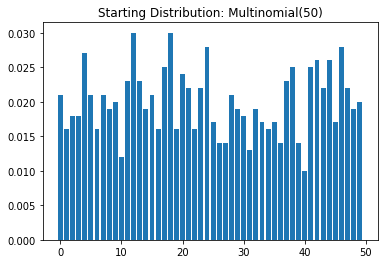

In [71]:
plt.bar(range(len(r)), r)
plt.title("Starting Distribution: Multinomial(50)")
plt.show()

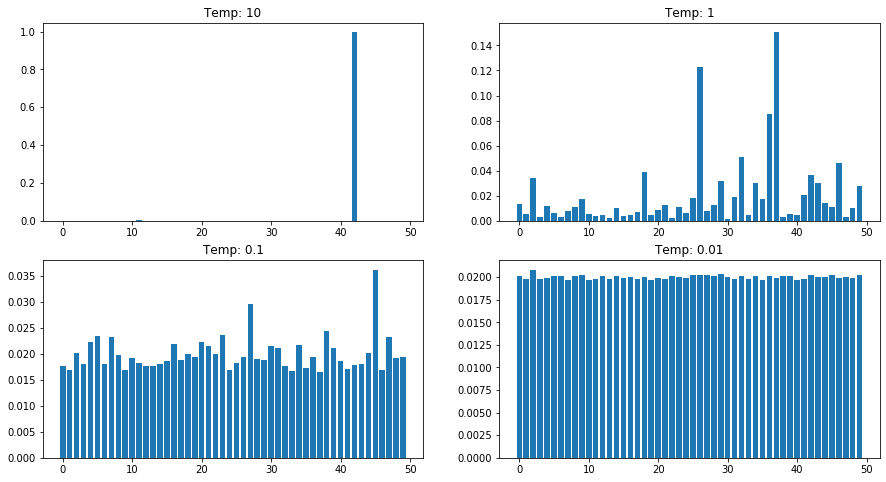

In [68]:
plt.figure(figsize=(15, 8))

temp = 10
plt.subplot(221)
plt.bar(range(len(one_hot)),do_gumble(r, temp))
plt.title("Temp: {}".format(temp))

temp = 1
plt.subplot(222)
plt.bar(range(len(one_hot)),do_gumble(r, temp))
plt.title("Temp: {}".format(temp))

temp = 0.1
plt.subplot(223)
plt.bar(range(len(one_hot)),do_gumble(r, temp))
plt.title("Temp: {}".format(temp))

temp = 0.01
plt.subplot(224)
plt.bar(range(len(one_hot)),do_gumble(r, temp))
plt.title("Temp: {}".format(temp))
plt.show()

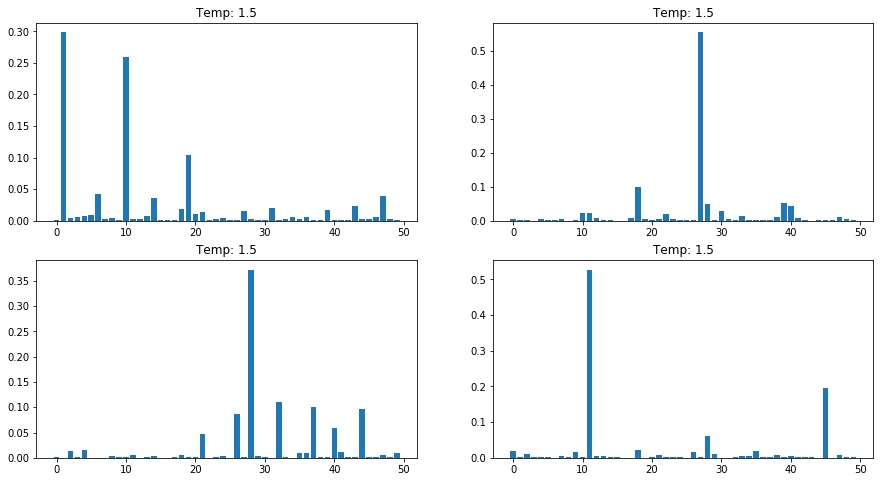

In [69]:
plt.figure(figsize=(15, 8))

temp = 1.5
plt.subplot(221)
plt.bar(range(len(one_hot)),do_gumble(r, temp))
plt.title("Temp: {}".format(temp))

plt.subplot(222)
plt.bar(range(len(one_hot)),do_gumble(r, temp))
plt.title("Temp: {}".format(temp))

plt.subplot(223)
plt.bar(range(len(one_hot)),do_gumble(r, temp))
plt.title("Temp: {}".format(temp))

plt.subplot(224)
plt.bar(range(len(one_hot)),do_gumble(r, temp))
plt.title("Temp: {}".format(temp))
plt.show()